<a href="https://colab.research.google.com/github/nurejannatnina/Learning-Python/blob/main/ML_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [104]:
data=pd.read_csv("/content/diabetes.csv")

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [108]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [109]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


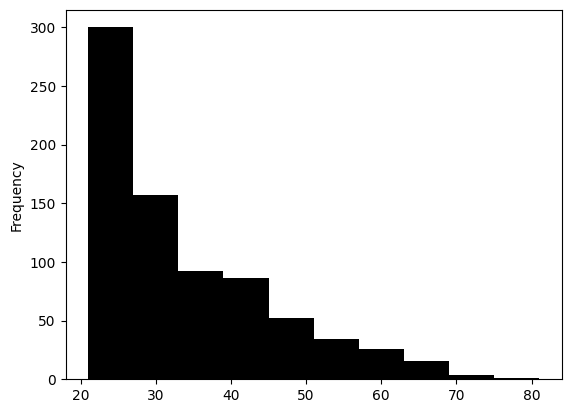

In [136]:
data.Age.plot(color="black",kind="hist")
plt.show()

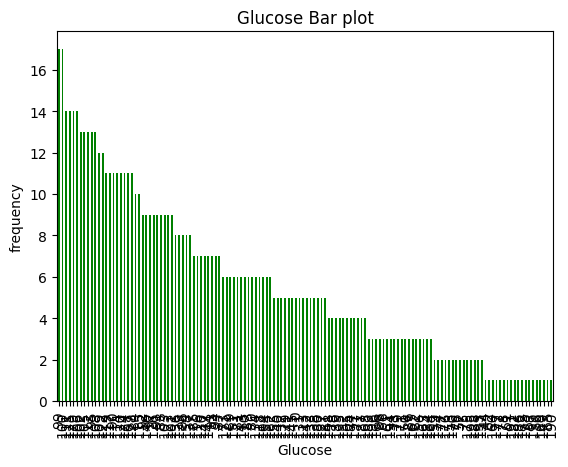

In [111]:
data["Glucose"].value_counts().plot(color="green",kind="bar")
plt.xlabel("Glucose")
plt.ylabel("frequency")
plt.title("Glucose Bar plot")
plt.show()

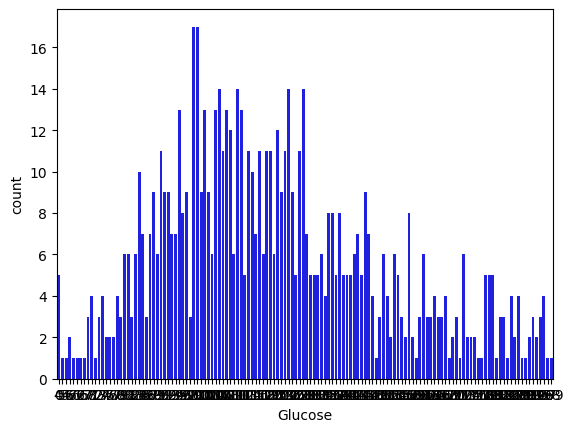

In [112]:
sns.countplot(data=data, x="Glucose", color="blue")
plt.show()

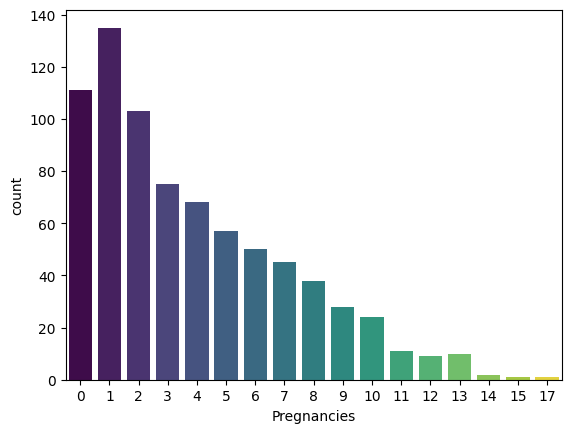

In [113]:
sns.countplot(data=data, x="Pregnancies", hue="Pregnancies", palette="viridis", legend=False)
plt.show()

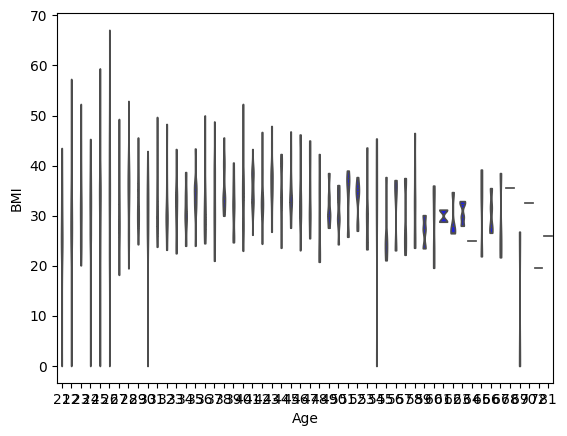

In [114]:
sns.violinplot(data=data,x="Age",y="BMI",color="blue",split=False,cut=0,bw_method=.3, inner="stick")
plt.show()

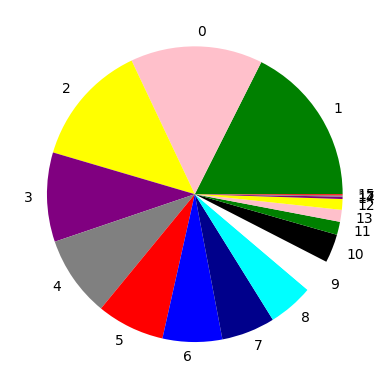

In [115]:
sizes=data.Pregnancies.value_counts().values
labels=data.Pregnancies.value_counts().index
colors=["green","pink","yellow","purple","grey","red","blue","darkblue","cyan","white","black"]
plt.pie(sizes,data=data,labels=labels,colors=colors)
plt.show()

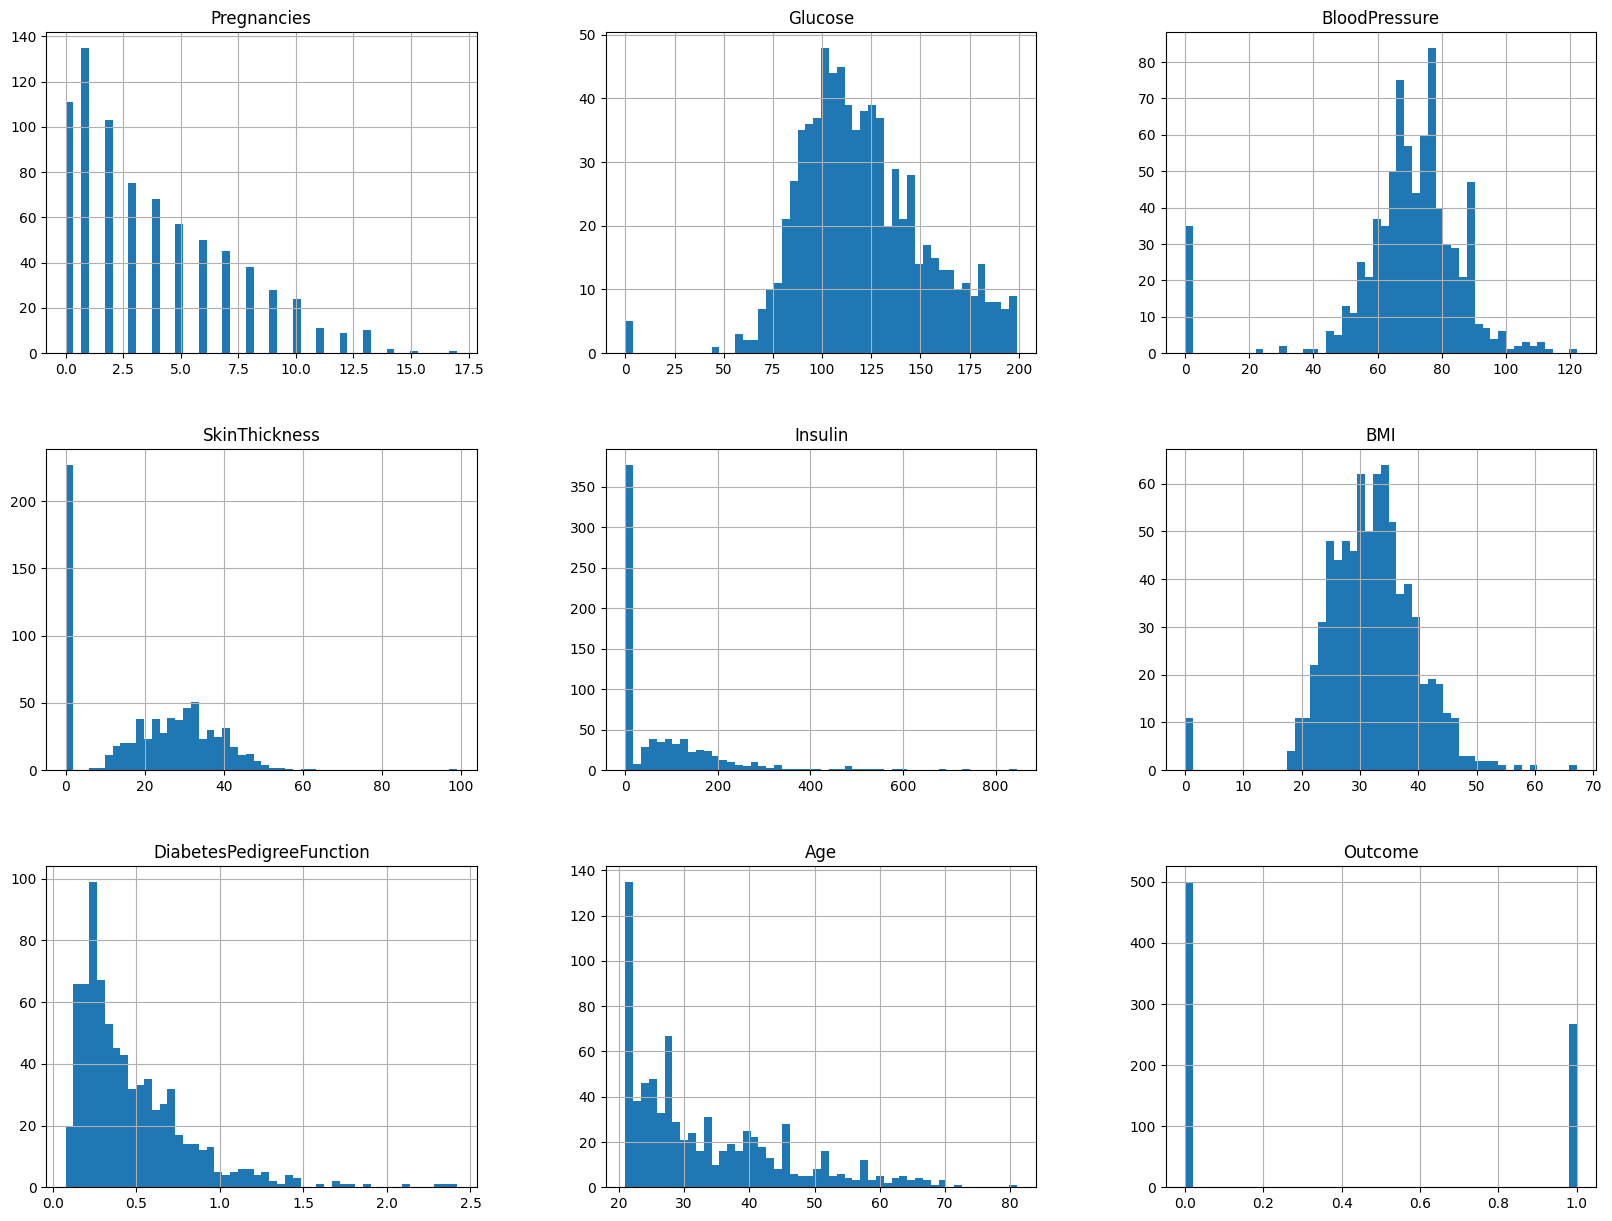

In [116]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [117]:
# let's look at the Corralation matrix of this data
corr_matrix = data.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


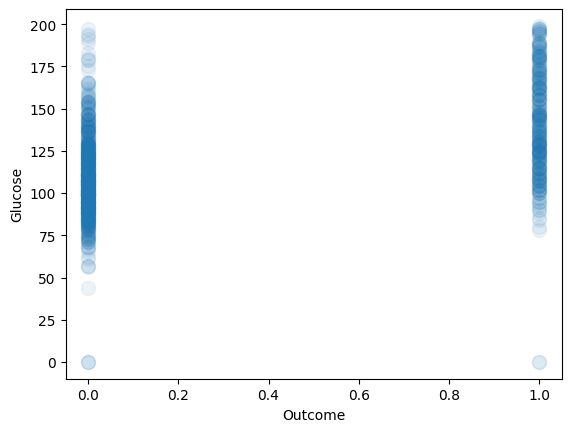

In [118]:
data.plot(kind = 'scatter', x = 'Outcome',y = 'Glucose',s = 100 ,alpha = 0.08)

plt.show()

In [119]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)


train_df_labels = train_df["Outcome"].copy()
train_df= train_df.drop("Outcome", axis=1)

In [120]:
#Transformation Pipelines

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('std_scaler', StandardScaler()), ])

train_prepared = num_pipeline.fit_transform(train_df)

# **Logistic Regression**

In [121]:
model = LogisticRegression()
model.fit(train_prepared, train_df_labels)

LogisticRegression()

In [122]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, train_prepared, train_df_labels, cv= 3, scoring='accuracy')

array([0.77922078, 0.77391304, 0.72173913])

In [123]:
prediction = model.predict(train_prepared)
print("LR Accuracy of Classifier: ", model.score(train_prepared, train_df_labels))

LR Accuracy of Classifier:  0.7756874095513748


# **SVM**

In [124]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_kernel_svm_clf = Pipeline([ ("scaler", StandardScaler()),
                                ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(train_prepared, train_df_labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [125]:
print("SVM Accuracy of Classifier: ", poly_kernel_svm_clf.score(train_prepared, train_df_labels))

SVM Accuracy of Classifier:  0.8451519536903039


In [126]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(poly_kernel_svm_clf, train_prepared, train_df_labels, cv=3)

# **Confusion Matrix**

In [127]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_df_labels, y_train_pred)

array([[375,  75],
       [109, 132]])

In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision Score:',precision_score(train_df_labels, y_train_pred))
print('Recall Score:',recall_score(train_df_labels, y_train_pred))
print('F1 Score:',f1_score(train_df_labels, y_train_pred))

Precision Score: 0.6376811594202898
Recall Score: 0.5477178423236515
F1 Score: 0.5892857142857143


# **Decission Tree**

In [130]:
# Prepare the test data
test_df_labels = test_df["Outcome"].copy()
test_df = test_df.drop("Outcome", axis=1)

# Apply the same transformations as the training data
test_prepared = num_pipeline.transform(test_df)

# Make predictions on the test data using the trained Decision Tree model
y_pred_dt_test = dt.predict(test_prepared)

# Evaluate the Decision Tree model on the test data
print("Decision Tree Accuracy on Test Set:", accuracy_score(test_df_labels, y_pred_dt_test))
print(f'precision score (Decision Tree) on Test Set: {precision_score(test_df_labels, y_pred_dt_test)}')
print(f'recall score (Decision Tree) on Test Set: {recall_score(test_df_labels, y_pred_dt_test)}')
print(f'f1 score (Decision Tree) on Test Set: {f1_score(test_df_labels, y_pred_dt_test)}')
print(f'roc_auc score (Decision Tree) on Test Set: {roc_auc_score(test_df_labels, y_pred_dt_test)}')

Decision Tree Accuracy on Test Set: 0.8051948051948052
precision score (Decision Tree) on Test Set: 0.7142857142857143
recall score (Decision Tree) on Test Set: 0.7407407407407407
f1 score (Decision Tree) on Test Set: 0.7272727272727273
roc_auc score (Decision Tree) on Test Set: 0.7903703703703703


# **ROC Curve**

In [131]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_df_labels, y_train_pred)

In [129]:
from sklearn.metrics import roc_auc_score

roc_auc_score(train_df_labels, y_train_pred)

np.float64(0.6905255878284924)

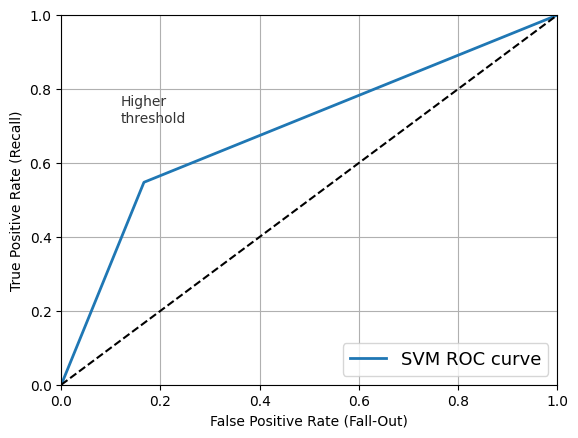

In [132]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

plt.plot([0, 1], [0, 1], 'k--')
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()